In [1]:
import os
import time
import numpy as np
import pandas as pd

from radar_object_tracking.radarprocessing.radar_td_textdata_parser import read_columns

directory_to_process = "data/radar/run6-TD"
td_data = []

def process_data_from_folder(self):
        
        # List all files in the directory
        files = os.listdir(directory_to_process)
        
        # Filter the files based on the naming convention
        txt_files = [f for f in files if f.startswith('trial') and f.endswith('.txt')]
        
        # Sort the files if needed (optional)
        txt_files.sort()
        
        # Process each file one by one
        for file_name in txt_files:
            file_path = os.path.join(directory_to_process, file_name)
            # print(f"Processing file: {file_path}")
            new_fd_data = read_columns(file_path)
            td_data.append(new_fd_data.td_data)

In [2]:
process_data_from_folder(directory_to_process)
td_data = np.array(td_data)
I1_data = td_data[:, :, 0]  # Extract the I1 signal, which is the first column across all frames and range bins  # Extract the first column, which corresponds to I1

print(td_data.shape)

(224, 1024, 4)


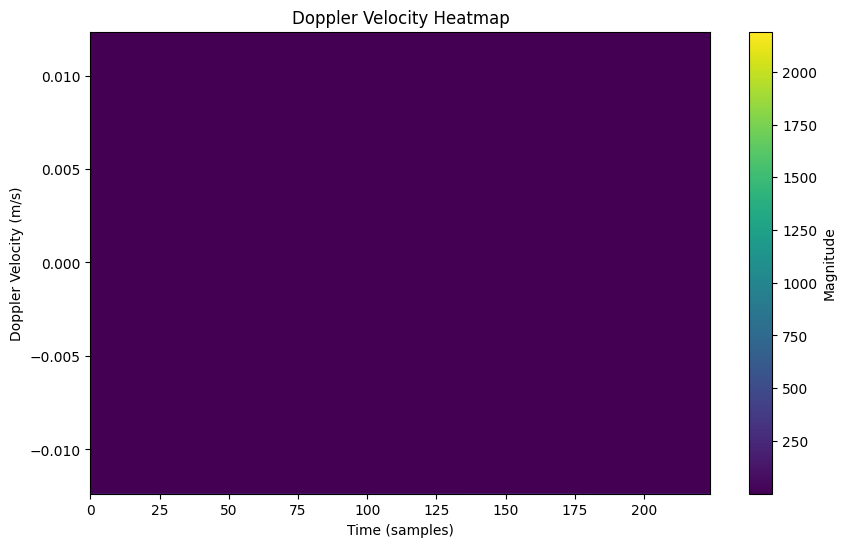

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to compute and plot the Doppler velocity heatmap
def plot_doppler_velocity_heatmap(td_data, wavelength, sampling_interval):
    """
    Function to plot Doppler velocity heatmap from FMCW radar data.
    
    Parameters:
    - td_data: Input time-domain data, shape (time_samples, voltage_samples, 4).
    - wavelength: Wavelength of the radar wave in meters.
    - sampling_interval: Time interval between samples in seconds.
    
    Returns:
    - None: Displays the heatmap.
    """
    # Constants
    c = 3e8  # Speed of light (m/s)
    fc = c / wavelength  # Calculate carrier frequency from wavelength

    # Extract I1 and Q1 signals
    I1 = td_data[:, :, 0]  # In-phase component
    Q1 = td_data[:, :, 1]  # Quadrature component

    # Step 1: Create the complex signal from I1 and Q1
    complex_signal = I1 + 1j * Q1

    # Step 2: Perform FFT across the 1024 samples for each of the 224 time samples
    fft_data = np.fft.fft(complex_signal, axis=1)
    fft_magnitude = np.abs(fft_data)

    # Frequency axis for FFT
    freqs = np.fft.fftfreq(td_data.shape[1], d=sampling_interval)

    # Step 3: Convert frequencies to velocities
    doppler_velocity = (freqs * c) / (2 * fc)

    # Step 4: Create heatmap for Doppler magnitude (velocity)
    plt.figure(figsize=(10, 6))
    plt.imshow(fft_magnitude.T, extent=[0, td_data.shape[0], doppler_velocity.min(), doppler_velocity.max()], aspect='auto', cmap='viridis')
    plt.colorbar(label='Magnitude')
    plt.xlabel('Time (samples)')
    plt.ylabel('Doppler Velocity (m/s)')
    plt.title('Doppler Velocity Heatmap')
    plt.show()
    
wavelength = 0.01212  # Wavelength for 24.750 GHz signal in meters
sampling_interval = 0.245  # Time interval between samples in seconds

plot_doppler_velocity_heatmap(td_data, wavelength, sampling_interval)

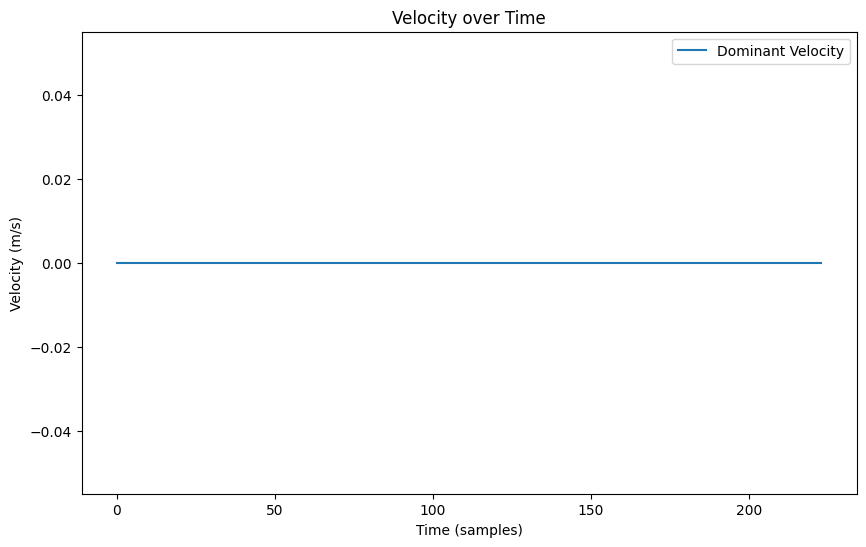

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to compute and plot the Doppler velocity heatmap
def plot_doppler_velocity_heatmap(td_data, wavelength, sampling_interval):
    """
    Function to plot Doppler velocity heatmap from FMCW radar data.
    
    Parameters:
    - td_data: Input time-domain data, shape (time_samples, voltage_samples, 4).
    - wavelength: Wavelength of the radar wave in meters.
    - sampling_interval: Time interval between samples in seconds.
    
    Returns:
    - None: Displays the heatmap of velocities over time.
    """
    # Constants
    c = 3e8  # Speed of light (m/s)
    fc = c / wavelength  # Calculate carrier frequency from wavelength

    # Extract I1 and Q1 signals
    I1 = td_data[:, :, 0]  # In-phase component
    Q1 = td_data[:, :, 1]  # Quadrature component

    # Step 1: Create the complex signal from I1 and Q1
    complex_signal = I1 + 1j * Q1

    # Step 2: Perform FFT across the 1024 samples for each of the 224 time samples
    fft_data = np.fft.fft(complex_signal, axis=1)
    fft_magnitude = np.abs(fft_data)

    # Frequency axis for FFT
    freqs = np.fft.fftfreq(td_data.shape[1], d=sampling_interval)

    # Step 3: Convert frequencies to velocities
    doppler_velocity = (freqs * c) / (2 * fc)

    # Step 4: Find the dominant velocity for each time sample
    # For each time sample, find the index of the maximum FFT magnitude (dominant Doppler shift)
    dominant_velocity = doppler_velocity[np.argmax(fft_magnitude, axis=1)]

    # Step 5: Plot the dominant velocity over time
    plt.figure(figsize=(10, 6))
    plt.plot(dominant_velocity, label="Dominant Velocity")
    plt.xlabel('Time (samples)')
    plt.ylabel('Velocity (m/s)')
    plt.title('Velocity over Time')
    plt.legend()
    plt.show()

# Example usage of the function with simulated data
wavelength = 3.9e-3  # Example wavelength (77 GHz radar)
sampling_interval = 0.245  # Example sampling interval (seconds)
plot_doppler_velocity_heatmap(td_data, wavelength, sampling_interval)
